In [0]:
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore') 

In [0]:
las_vegas_data= pd.read_pickle('/content/drive/My Drive/las_vegas_data_tokenized_final.pkl')

In [9]:
las_vegas_data

,business_id,review_id,stars,latitude,longitude,text,postal_code,category,tokenized_text,token_tagged,imp_tags,label,polarity
0,tstimHoMcYbkSC4eBA1wEg,iWFBGYotfzwiLsOka0e1Rw,4.5,36.195615,-115.040529,we found out about this gem from the mans cowo...,89156,Mexican,"[found, gem, man, coworker, used, live, apt, c...","[(found, VBN), (gem, NN), (man, NN), (coworker...","[found, gem, man, coworker, used, live, apt, c...",positive,0.238242
1,tstimHoMcYbkSC4eBA1wEg,QhiVo4F8MFSoz1T7YggcXA,4.5,36.195615,-115.040529,the chips are a fried corn tortilla which were...,89156,Mexican,"[chip, fried, corn, tortilla, surprisingly, am...","[(chip, NN), (fried, VBD), (corn, NN), (tortil...","[chip, fried, corn, tortilla, surprisingly, am...",positive,0.342857
3,tstimHoMcYbkSC4eBA1wEg,lJfGtkCc4in6Xcq-_Wtfwg,4.5,36.195615,-115.040529,ive ordered caldo de rez from here twice and b...,89156,Mexican,"[ive, ordered, caldo, de, rez, twice, time, fo...","[(ive, JJ), (ordered, VBD), (caldo, NN), (de, ...","[ive, ordered, caldo, twice, time, food, sooo,...",positive,0.109524
4,tstimHoMcYbkSC4eBA1wEg,BKoH9aG1ZjUjy2brzkxzJw,4.5,36.195615,-115.040529,my boyfriend doesnt like mexican food yet he l...,89156,Mexican,"[boyfriend, doesnt, like, mexican, food, yet, ...","[(boyfriend, VB), (doesnt, NN), (like, IN), (m...","[boyfriend, doesnt, mexican, food, yet, loved,...",positive,0.245631
6,tstimHoMcYbkSC4eBA1wEg,MM8yy3uGKCuAEqASCqQazQ,4.5,36.195615,-115.040529,the food was good everything was well priced ...,89156,Mexican,"[food, good, everything, well, priced, ordered...","[(food, NN), (good, JJ), (everything, NN), (we...","[food, good, everything, well, priced, ordered...",positive,0.293492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712587,p5rpYtxS5xPQjt3MXYVEwA,Wf7NrNUdaxJIn_tqWLL2tQ,4.0,36.026212,-115.119341,i like the novelty of greens and proteins but ...,89123,American,"[like, novelty, green, protein, find, executio...","[(like, IN), (novelty, NN), (green, JJ), (prot...","[novelty, green, protein, find, execution, bit...",positive,0.182292
712588,p5rpYtxS5xPQjt3MXYVEwA,CXIS2OWw0xYkMATJtv4DsQ,4.0,36.026212,-115.119341,this place is hugely popular with people leavi...,89123,American,"[place, hugely, popular, people, leaving, gym,...","[(place, NN), (hugely, RB), (popular, JJ), (pe...","[place, hugely, popular, people, leaving, gym,...",positive,0.228333
712590,p5rpYtxS5xPQjt3MXYVEwA,pn5TS8GiEs0iE_O1dTkWuQ,4.0,36.026212,-115.119341,i ordered the chicken quinoa salad i cant beli...,89123,American,"[ordered, chicken, quinoa, salad, cant, believ...","[(ordered, VBN), (chicken, JJ), (quinoa, NN), ...","[ordered, chicken, quinoa, salad, cant, believ...",positive,0.257778
712591,p5rpYtxS5xPQjt3MXYVEwA,ACUg1ScLb6pwL6jJyp65-w,4.0,36.026212,-115.119341,i love this place salmon with steamed asparagu...,89123,American,"[love, place, salmon, steamed, asparagus, brow...","[(love, VB), (place, NN), (salmon, NN), (steam...","[love, place, salmon, steamed, asparagus, brow...",positive,0.471875


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    print('Features accquired')
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    print('total_counts done')
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    print('Forming dictionary')
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    print('X_pos done and started to plot')
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


Features transforming
Plotting the common words
Features accquired
total_counts done
Forming dictionary
X_pos done and started to plot


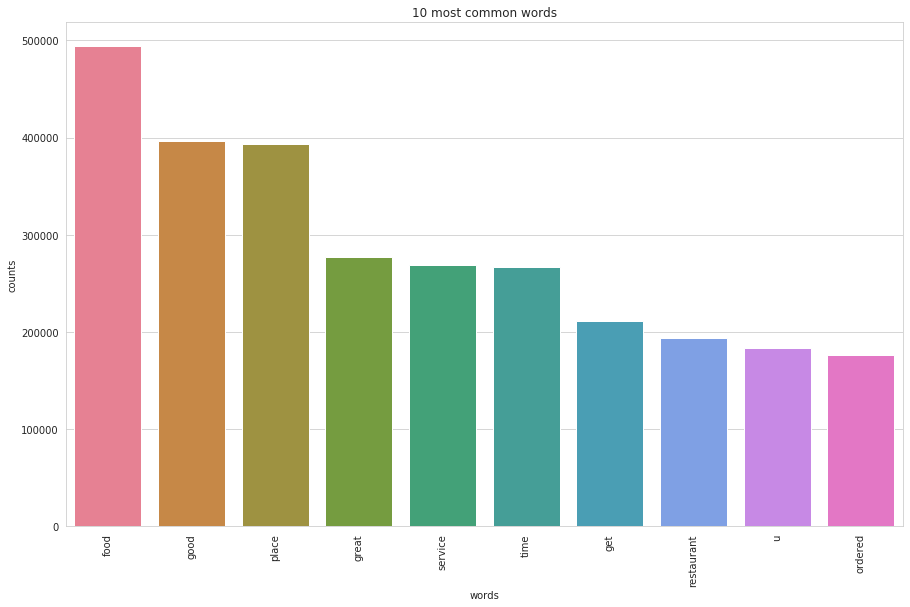

In [0]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
# Fit and transform the processed titles
print('Features transforming')
count_data = count_vectorizer.fit_transform(las_vegas_data['imp_tags'])

# Visualise the 10 most common words
print('Plotting the common words')
plot_10_most_common_words(count_data, count_vectorizer)

In [0]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
food great service amazing place time vega best back good

Topic #1:
good chicken burger like ordered cheese fry pizza sauce place

Topic #2:
place food good great service sushi vega love time always

Topic #3:
food u time order get service place one table like

Topic #4:
dish restaurant menu dessert good steak one sauce like ordered


In [0]:
count_vectorizer.vocabulary_

In [0]:
{k: v for k, v in sorted(count_vectorizer.vocabulary_.items(), key=lambda item: item[1], reverse=True)}

In [11]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
good chicken sushi sauce roll ordered flavor fried dish also

Topic #1:
burger fry pizza good cheese sandwich place ordered food get

Topic #2:
food restaurant great service good dinner steak u meal experience

Topic #3:
food place great good service time always go vega love

Topic #4:
food u time get place order service table back didnt
